
#Create a Rnn for time series



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils


In [18]:
#Get access to google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Get csv file from the drive

path = 'drive/My Drive/files_project/'

df = pd.read_csv(path + 'eat.csv')


In [0]:
 def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [21]:
print(df.shape)
print(df.head(4))
print(df.isnull().sum())
print(df.dtypes)

(2999, 14)
       Time    Acce_X    Acce_Y    Acce_Z    Gyro_X    Gyro_Y    Gyro_Z  \
0  15:30:52  0.021510  0.013468  0.032614 -0.079174 -0.066447 -0.021719   
1  15:30:52  0.017175 -0.000910  0.003857 -0.061604 -0.051309 -0.008880   
2  15:30:52  0.002546  0.007264  0.006394 -0.083048  0.029500 -0.039431   
3  15:30:52 -0.000327  0.040301  0.031068 -0.114733  0.045463 -0.047616   

   Gravity_X  Gravity_Y  Gravity_Z      Roll     Pitch       Yaw  Heart_Rate  
0  -0.350978  -0.499675  -0.791921 -0.417183  0.523223  0.217938         NaN  
1  -0.356714  -0.494512  -0.792599 -0.422900  0.517273  0.213985         NaN  
2  -0.340116  -0.498260  -0.797532 -0.403108  0.521591  0.199105         NaN  
3  -0.335473  -0.490206  -0.804460 -0.395089  0.512326  0.190692         NaN  
Time           0
Acce_X         0
Acce_Y         0
Acce_Z         0
Gyro_X         0
Gyro_Y         0
Gyro_Z         0
Gravity_X      0
Gravity_Y      0
Gravity_Z      0
Roll           0
Pitch          0
Yaw           

In [22]:
number = round(float(df["Heart_Rate"].mean()))
print(float(number))

analyze_data = df.fillna(float(number))
print(analyze_data['Heart_Rate'])

76.0
0       76.0
1       76.0
2       76.0
3       76.0
4       76.0
5       76.0
6       76.0
7       76.0
8       76.0
9       76.0
10      76.0
11      76.0
12      76.0
13      76.0
14      76.0
15      76.0
16      76.0
17      76.0
18      76.0
19      76.0
20      76.0
21      76.0
22      76.0
23      76.0
24      76.0
25      76.0
26      76.0
27      76.0
28      76.0
29      76.0
        ... 
2969    81.0
2970    81.0
2971    81.0
2972    81.0
2973    81.0
2974    81.0
2975    81.0
2976    81.0
2977    81.0
2978    81.0
2979    81.0
2980    81.0
2981    81.0
2982    81.0
2983    81.0
2984    81.0
2985    81.0
2986    81.0
2987    81.0
2988    81.0
2989    81.0
2990    81.0
2991    81.0
2992    81.0
2993    81.0
2994    81.0
2995    81.0
2996    81.0
2997    81.0
2998    81.0
Name: Heart_Rate, Length: 2999, dtype: float64


In [23]:
analyze_data['Activity'] = 'eating'
print(analyze_data.head())

       Time    Acce_X    Acce_Y    Acce_Z    Gyro_X    Gyro_Y    Gyro_Z  \
0  15:30:52  0.021510  0.013468  0.032614 -0.079174 -0.066447 -0.021719   
1  15:30:52  0.017175 -0.000910  0.003857 -0.061604 -0.051309 -0.008880   
2  15:30:52  0.002546  0.007264  0.006394 -0.083048  0.029500 -0.039431   
3  15:30:52 -0.000327  0.040301  0.031068 -0.114733  0.045463 -0.047616   
4  15:30:53 -0.035915  0.071777  0.066141 -0.201705  0.023478  0.039614   

   Gravity_X  Gravity_Y  Gravity_Z      Roll     Pitch       Yaw  Heart_Rate  \
0  -0.350978  -0.499675  -0.791921 -0.417183  0.523223  0.217938        76.0   
1  -0.356714  -0.494512  -0.792599 -0.422900  0.517273  0.213985        76.0   
2  -0.340116  -0.498260  -0.797532 -0.403108  0.521591  0.199105        76.0   
3  -0.335473  -0.490206  -0.804460 -0.395089  0.512326  0.190692        76.0   
4  -0.335544  -0.475784  -0.813044 -0.391408  0.495855  0.184184        76.0   

  Activity  
0   eating  
1   eating  
2   eating  
3   eating  
4  

In [0]:
def plot_activity(activity, data):
    fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Time'], data['Acce_X'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['Acce_Y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['Acce_Z'], 'Z-Axis')
    plot_axis(ax3, data['Time'], data['Gyro_X'], 'X-Axis')
    plot_axis(ax4, data['Time'], data['Gyro_Y'], 'Y-Axis')
    plot_axis(ax5, data['Time'], data['Gyro_Z'], 'Z-Axis')
    plot_axis(ax6, data['Time'], data['Heart_Rate'], 'Heart')
    plt.subplots_adjust(hspace=0.1)
    fig.suptitle(activity)
    plt.subplots_adjust(top=1)
    plt.show()

In [0]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

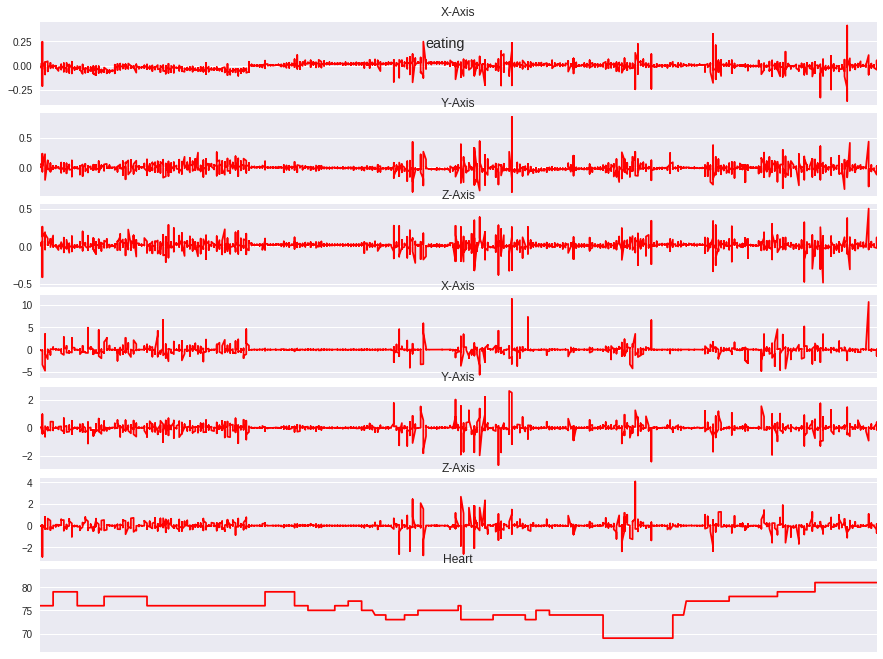

In [27]:
#for activity in np.unique(analyze_data['Activity']):
#subset = analyze_data[analyze_data['Activity'] == activity][:2999]
subset = analyze_data[:2999]
plot_activity('eating', subset)

In [28]:
  # Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
analyze_data[LABEL] = le.fit_transform(analyze_data['Activity'].values.ravel())

'''
#You need this to get back the real label
analyze_data[LABEL] = le.inverse_transform(analyze_data[LABEL].values.ravel())
print(analyze_data)
'''


'\n#You need this to get back the real label\nanalyze_data[LABEL] = le.inverse_transform(analyze_data[LABEL].values.ravel())\nprint(analyze_data)\n'

In [0]:
#dvided the label from the features 

Activity_label = np.array(analyze_data['Activity'])
analyze_data = analyze_data.drop('Activity', axis = 1)


#Normalize And Standardize Time Series Data

we rescaling the data from original so the vaules are withibn range of 0 to 1

y  = (x - mean) / std

y = ( x - min) / (max - min)

In [51]:
for column in analyze_data.columns[1:14]:
    print(column)

Acce_X
Acce_Y
Acce_Z
Gyro_X
Gyro_Y
Gyro_Z
Gravity_X
Gravity_Y
Gravity_Z
Roll
Pitch
Yaw
Heart_Rate


In [0]:
#take a df to do things and see the outecomes
checkData = analyze_data
checkData1 = analyze_data
df1 = pd.DataFrame()

In [0]:
#go over the colunms in pd and do normalization and standardiztion 
for column in checkData.columns[1:14]:
  checkData[column] = (checkData[column] - np.mean(checkData[column]))/(np.std(checkData[column]))  
  checkData[column] = (checkData[column] - min(checkData[column])) / (max(checkData[column]) - min(checkData[column]))
  #3 digits in decimal 
  checkData = round(checkData,3)
  #print(np.mean(df1))
  #print(np.std(df1))
  
  

In [54]:
print(checkData.head())

       Time  Acce_X  Acce_Y  Acce_Z  Gyro_X  Gyro_Y  Gyro_Z  Gravity_X  \
0  15:30:52   0.495   0.338   0.525   0.326   0.490   0.411      0.251   
1  15:30:52   0.489   0.326   0.495   0.327   0.493   0.412      0.247   
2  15:30:52   0.470   0.333   0.497   0.325   0.508   0.408      0.258   
3  15:30:52   0.467   0.359   0.523   0.323   0.511   0.407      0.262   
4  15:30:53   0.421   0.384   0.559   0.318   0.507   0.419      0.261   

   Gravity_Y  Gravity_Z   Roll  Pitch    Yaw  Heart_Rate  ActivityEncoded  
0      0.000      0.136  0.431  1.000  0.554       0.583                0  
1      0.003      0.135  0.430  0.997  0.553       0.583                0  
2      0.001      0.132  0.434  1.000  0.550       0.583                0  
3      0.007      0.128  0.435  0.995  0.549       0.583                0  
4      0.016      0.122  0.435  0.987  0.548       0.583                0  


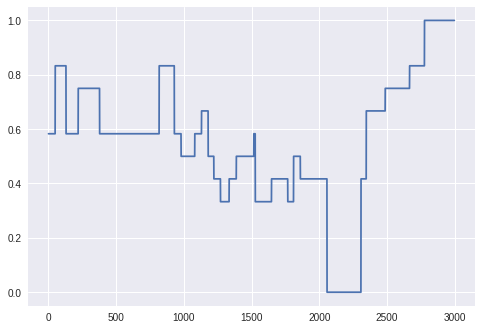

In [68]:
checkData['Heart_Rate'].plot(style=[])
plt.show()